<a href="https://colab.research.google.com/github/venukashoju/ML/blob/main/Disease_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


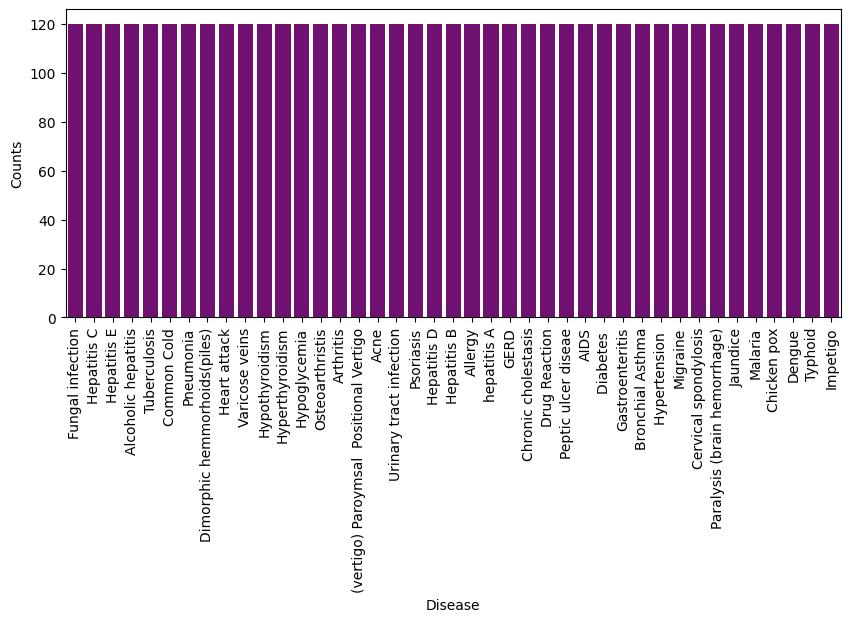

41

In [ ]:
path = 'https://media.geeksforgeeks.org/wp-content/cdn-uploads/20210826192554/Training.csv'
df = pd.read_csv(path, sep=',')
df = df.dropna(axis=1)
disease_counts = df['prognosis'].value_counts()
tmp_df = pd.DataFrame({ "Disease": disease_counts.index,
    "Counts": disease_counts.values})
plt.figure(figsize=(10,4))
sns.barplot(x='Disease',y='Counts',data=tmp_df,color='purple')
plt.xticks(rotation=90)
plt.show()
# df.head()
df['prognosis'].nunique()


In [ ]:
encoder = LabelEncoder()
df['prognosis']=encoder.fit_transform(df['prognosis'])
df['prognosis'].max()

40

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(f'Train:{X_train.shape},{y_train.shape}')
print(f'Test:{X_test.shape},{y_test.shape}')

Train:(3936, 132),(3936,)
Test:(984, 132),(984,)


In [ ]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, Y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data:100.0
Accuracy on test data:100.0


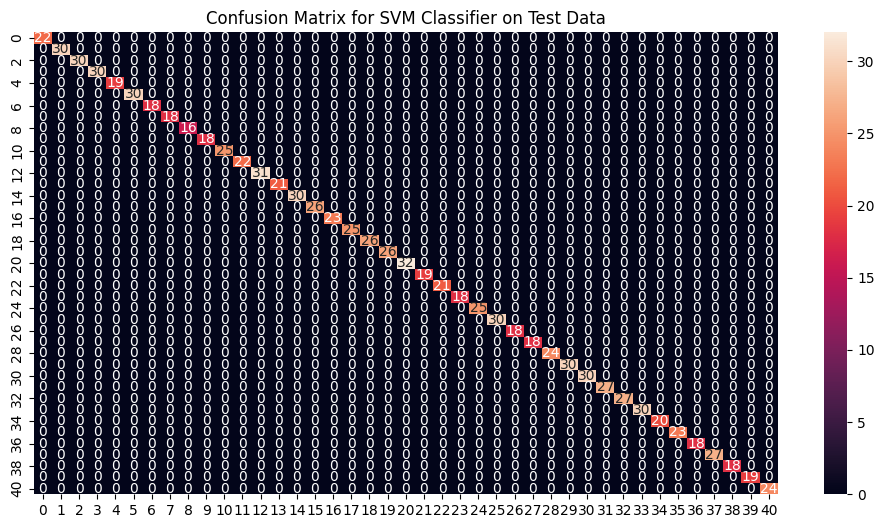

In [ ]:
svm_model = SVC()
svm_model.fit(X_train,y_train)
pred = svm_model.predict(X_test)
print(f"Accuracy on train data:{accuracy_score(y_train,svm_model.predict(X_train))*100}")
print(f"Accuracy on test data:{accuracy_score(y_test,svm_model.predict(X_test))*100}")
cf = confusion_matrix(y_test,pred)
plt.figure(figsize=(12,6))
sns.heatmap(cf,annot=True)
plt.title('Confusion Matrix for SVM Classifier on Test Data')
plt.show()

Accuracy on train data:100.0
Accuracy on test data:100.0


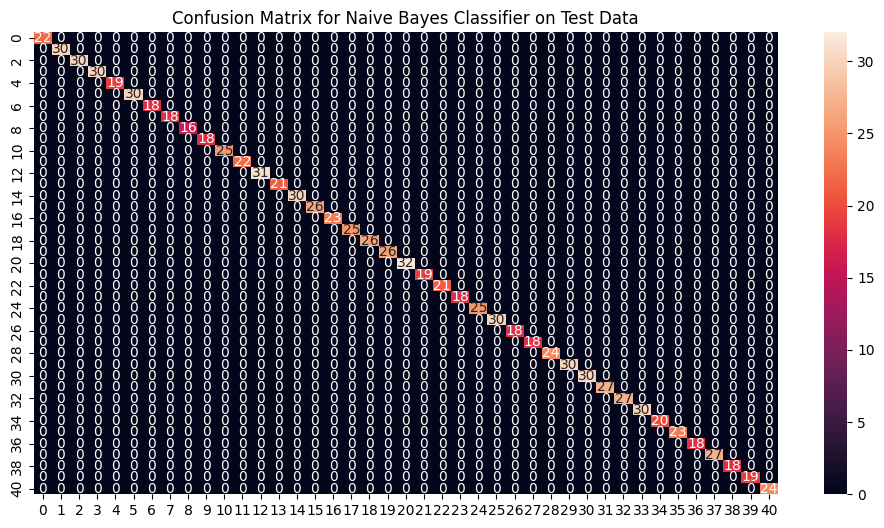

In [ ]:
gauss_nb = GaussianNB()
gauss_nb.fit(X_train,y_train)
pred = gauss_nb.predict(X_test)
print(f"Accuracy on train data:{accuracy_score(y_train,gauss_nb.predict(X_train))*100}")
print(f"Accuracy on test data:{accuracy_score(y_test,gauss_nb.predict(X_test))*100}")
cf = confusion_matrix(y_test,pred)
plt.figure(figsize=(12,6))
sns.heatmap(cf,annot=True)
plt.title('Confusion Matrix for Naive Bayes Classifier on Test Data')
plt.show()

Accuracy on train data:100.0
Accuracy on test data:100.0


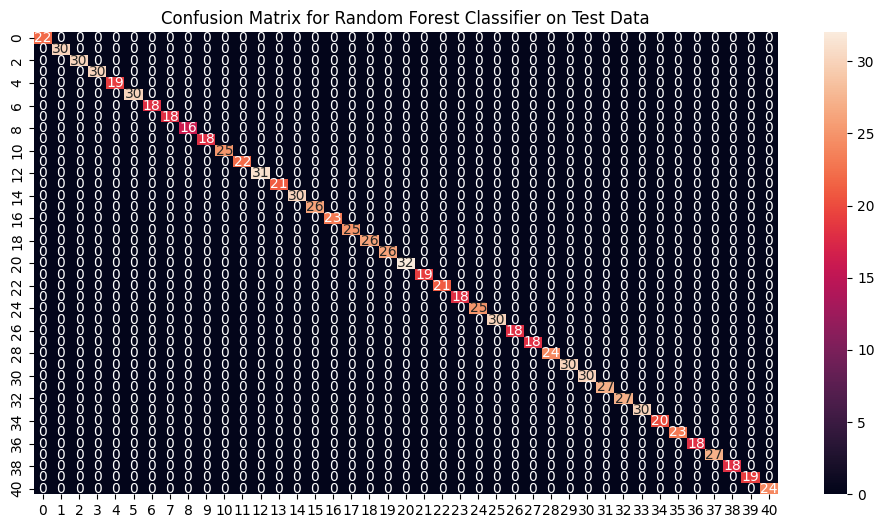

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print(f"Accuracy on train data:{accuracy_score(y_train,rf.predict(X_train))*100}")
print(f"Accuracy on test data:{accuracy_score(y_test,rf.predict(X_test))*100}")
cf = confusion_matrix(y_test,pred)
plt.figure(figsize=(12,6))
sns.heatmap(cf,annot=True)
plt.title('Confusion Matrix for Random Forest Classifier on Test Data')
plt.show()

Accuracy on Test dataset by the combined model: 100.0


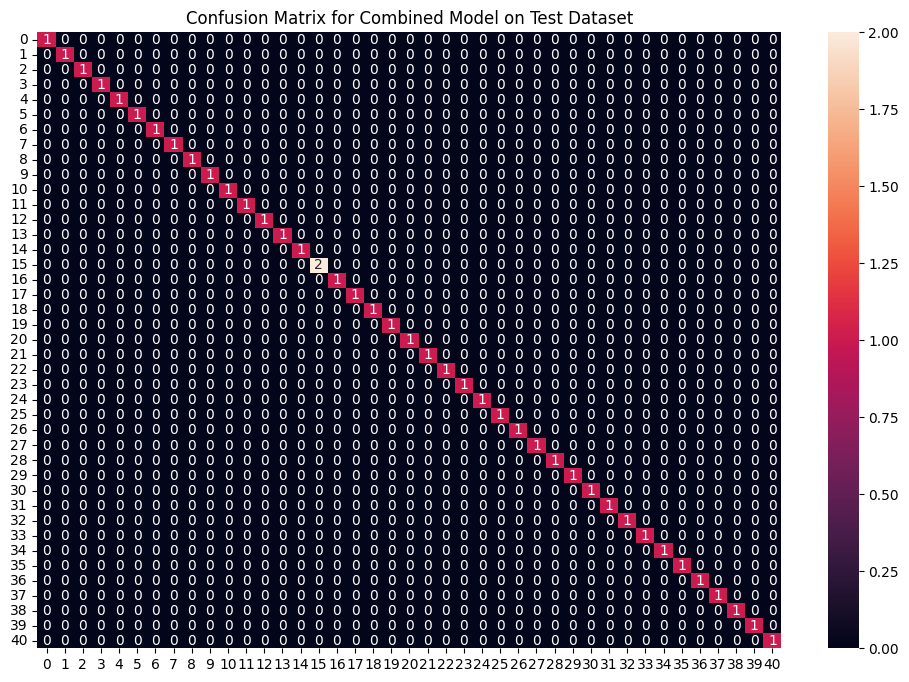

In [ ]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, Y)
final_nb_model.fit(X, Y)
final_rf_model.fit(X, Y)
path = 'https://media.geeksforgeeks.org/wp-content/cdn-uploads/20210826192633/Testing.csv'
test_data = pd.read_csv(path,sep=',')

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])


svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

!pip install scipy
from scipy import stats

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()



In [ ]:
symptoms = X.columns.values
symptoms

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press